# Использование моделей МО с целью предсказания уровня удовлетворенности сотрудника и вероятности его ухода из компании

**Описание данных:**

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


**Описание проекта:** 
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 
У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**Цели проекта:** 
- построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
- построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**План работ:**
- Задача 1: Предсказание уровня удовлетворённости сотрудника
    - Загрузить данные
    - Предобработать данные
    - Провести исследовательский анализ данных
    - Подготовить данные
    - Обучить модели
    - Оформить выводы
    
    
- Задача 2: Предсказание увольнения сотрудника из компании
    - Загрузить данные
    - Предобработать данные
    - Провести исследовательский анализ данных
    - Добавить новый входной признак
    - Подготовить данные
    - Обучить модели
    - Оформить выводы
    
    
- Сделать общий вывод

In [1]:
!pip install -Uq scikit-learn
!pip install -Uq phik

In [2]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from phik.report import plot_correlation_matrix
from phik import report

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC

from sklearn.metrics import make_scorer, roc_auc_score

## Задача: Предсказание уровня удовлетворённости сотрудника

### Загрузка данных

In [3]:
train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
y_test.info()
y_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


**Вывод:** Данные соответствуют описанию задачи. Названия и типы столбцов соответствуют стандартам оформления. Присутсвтуют пропуски, которые будут обработаны на следующем этапе.

### Предобработка данных

In [7]:
# Train
# Проверка пропусков
print(train.isna().sum());
# Поиск явных дубликатов
print('\nКоличество дубликатов:', train.duplicated().sum())

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Количество дубликатов: 0


In [8]:
# X_test
# Проверка пропусков
print(X_test.isna().sum());
# Поиск явных дубликатов
print('\nКоличество дубликатов:', X_test.duplicated().sum())

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Количество дубликатов: 0


In [9]:
# y_test
# Проверка пропусков
print(y_test.isna().sum());
# Поиск явных дубликатов
print('\nКоличество дубликатов:', y_test.duplicated().sum())

id                       0
job_satisfaction_rate    0
dtype: int64

Количество дубликатов: 0


In [10]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [11]:
y_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [12]:
test = X_test.merge(y_test, on='id')

In [13]:
num_features = ['id', 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
cat_features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
all_columns = cat_features + num_features


imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
prepreprocessor = ColumnTransformer(
    transformers=[
        ('imputer', imputer, cat_features),
        ('num_p', 'passthrough', num_features)
    ],
    remainder='passthrough')

prepreprocessor = Pipeline([('prepreprocessor', prepreprocessor)])

train_prepreprocessed = prepreprocessor.fit_transform(train)
pre_train = pd.DataFrame(train_prepreprocessed, columns=all_columns)

test_prepreprocessed = prepreprocessor.fit_transform(test)
pre_test = pd.DataFrame(test_prepreprocessed, columns=all_columns)

print(pre_train.isna().sum())
print()
print(pre_test.isna().sum())

dept                     0
level                    0
workload                 0
last_year_promo          0
last_year_violations     0
id                       0
employment_years         0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

dept                     0
level                    0
workload                 0
last_year_promo          0
last_year_violations     0
id                       0
employment_years         0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


In [14]:
pre_train[['id', 'employment_years', 'supervisor_evaluation', 
           'salary']] = pre_train[['id', 'employment_years', 
           'supervisor_evaluation', 'salary']].astype(int)
pre_train['job_satisfaction_rate'] = pre_train['job_satisfaction_rate'].astype(float)

pre_test[['id', 'employment_years', 'supervisor_evaluation', 
           'salary']] = pre_test[['id', 'employment_years', 
           'supervisor_evaluation', 'salary']].astype(int)
pre_test['job_satisfaction_rate'] = pre_test['job_satisfaction_rate'].astype(float)

**Вывод:** На этапе предобработке данных были замечены пропуски, которые были обработаны с помощью пайплайна. Явные дубликаты в данных отсутствовали.

### Исследовательский анализ данных

In [15]:
def num_research(data):
    num_cols = data.select_dtypes(include=['number']).columns
    num_cols = num_cols.drop('id')
    num_plots = len(num_cols)
    
    plt.figure(figsize=(10, 5 * num_plots))
    for i, col in enumerate(num_cols):
        # Гистограмма
        plt.subplot(num_plots, 2, 2*i + 1)
        data[col].hist(bins=10)
        plt.title(f'Hist {col}')
        plt.xlabel(col)

        # Ящик
        plt.subplot(num_plots, 2, 2*i + 2)
        data.boxplot(column=col)
        plt.title(f'Box {col}')
    plt.tight_layout()
    plt.show()

In [16]:
def pie(data):
    cat_cols = data.select_dtypes(include=['object']).columns
    num_plots = len(cat_cols)
    
    plt.figure(figsize=(10, 5 * num_plots))
    for i, col in enumerate(cat_cols):
        # Пирожок
        plt.subplot(num_plots, 2, i + 1)
        data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie {col}')
    plt.tight_layout()
    plt.show()

#### Тренировочные данные

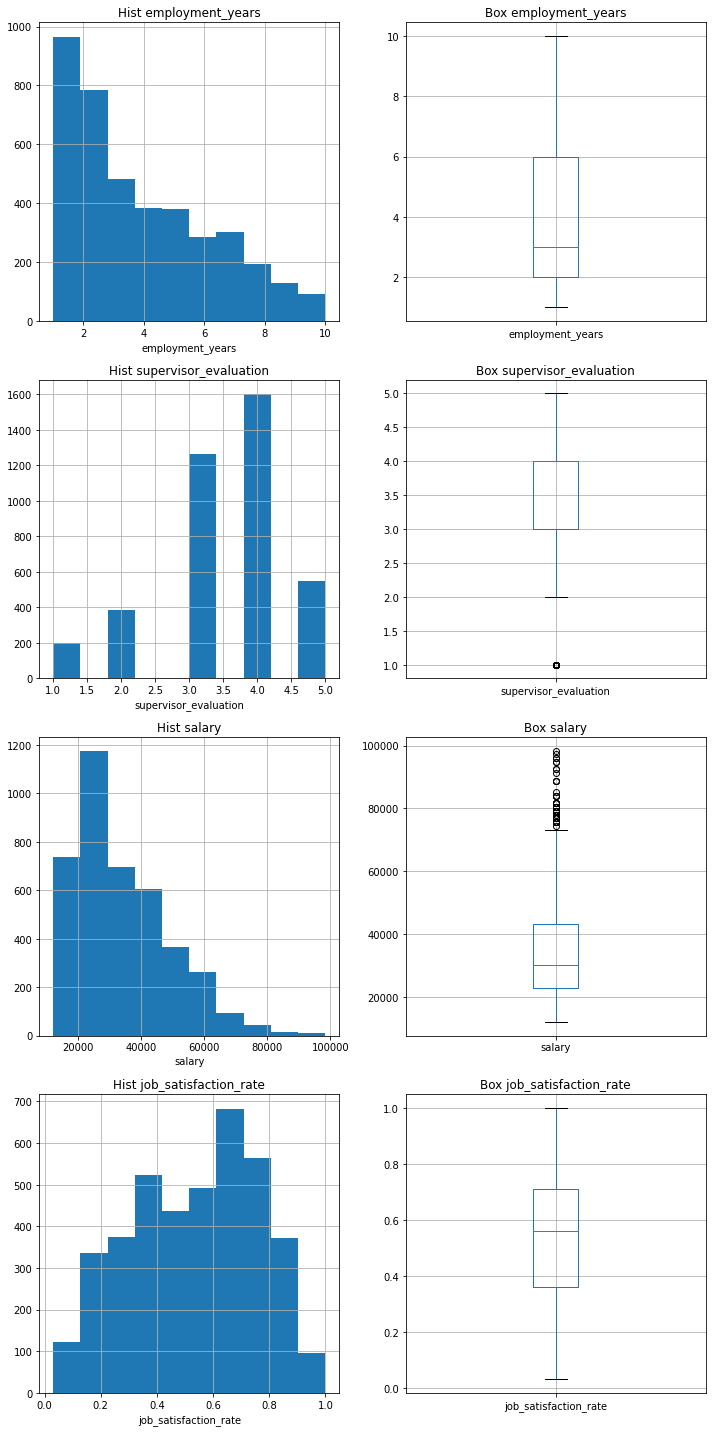

In [17]:
num_research(pre_train)

In [18]:
pre_train.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


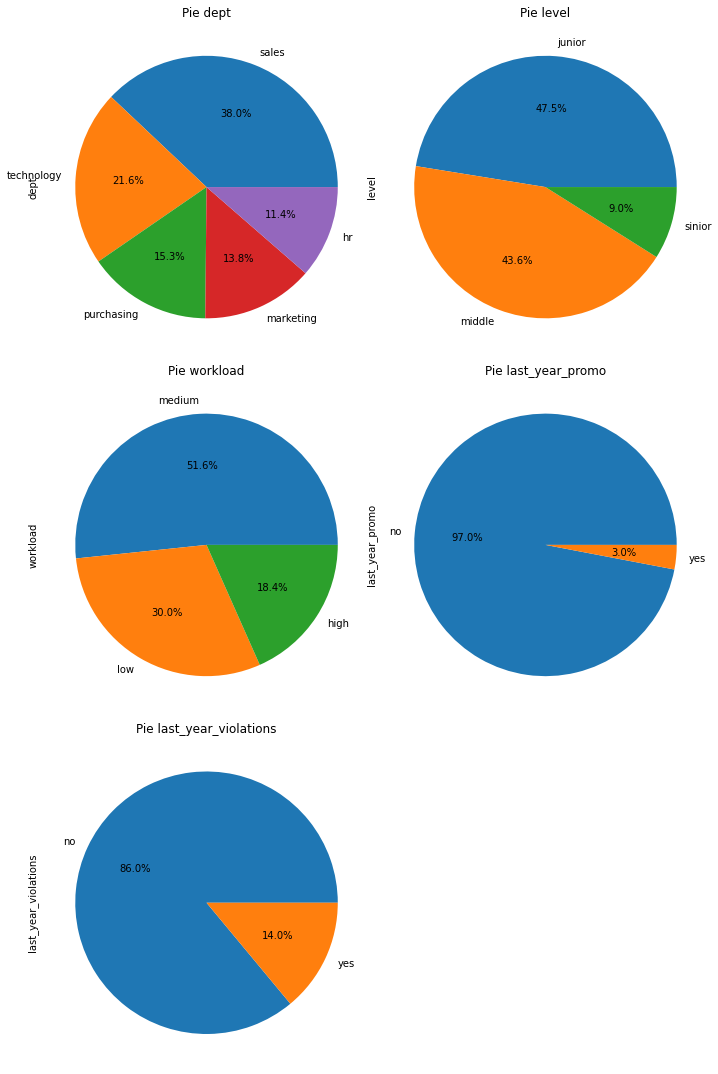

In [19]:
pie(pre_train)

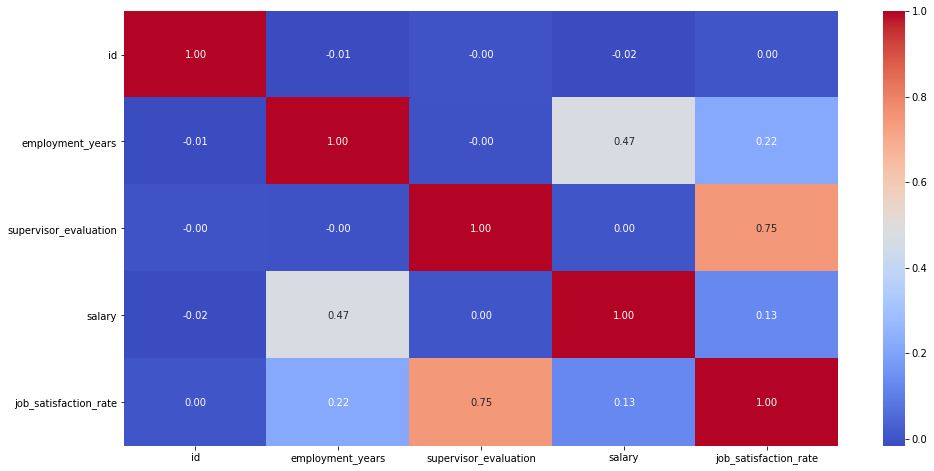

In [20]:
plt.figure(figsize=(16, 8))
cm_train = pre_train.corr(method='spearman')
sns.heatmap(cm_train, annot=True, fmt='.2f', cmap='coolwarm');

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable id is large: 4000. Are you sure this is not an interval variable? Analysis for pairs of variables including id can be slow.
  warnings.warn(


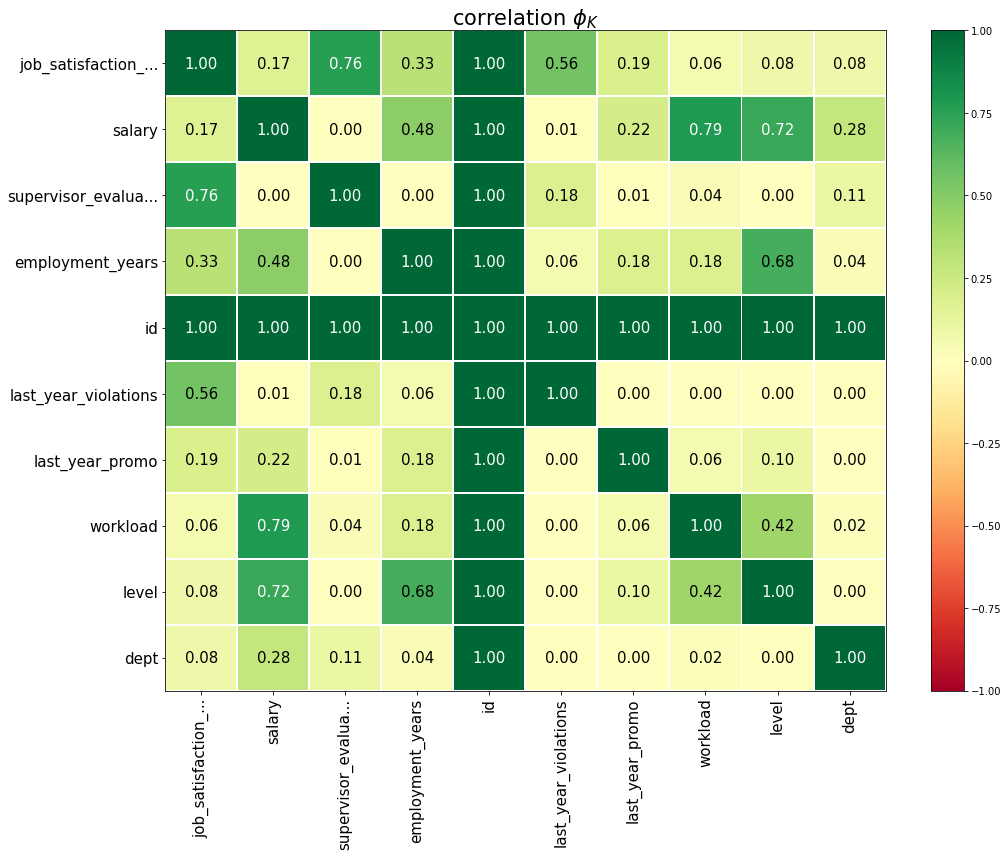

In [21]:
# список интервальных признаков
interval_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = pre_train.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

#### Тестовые данные

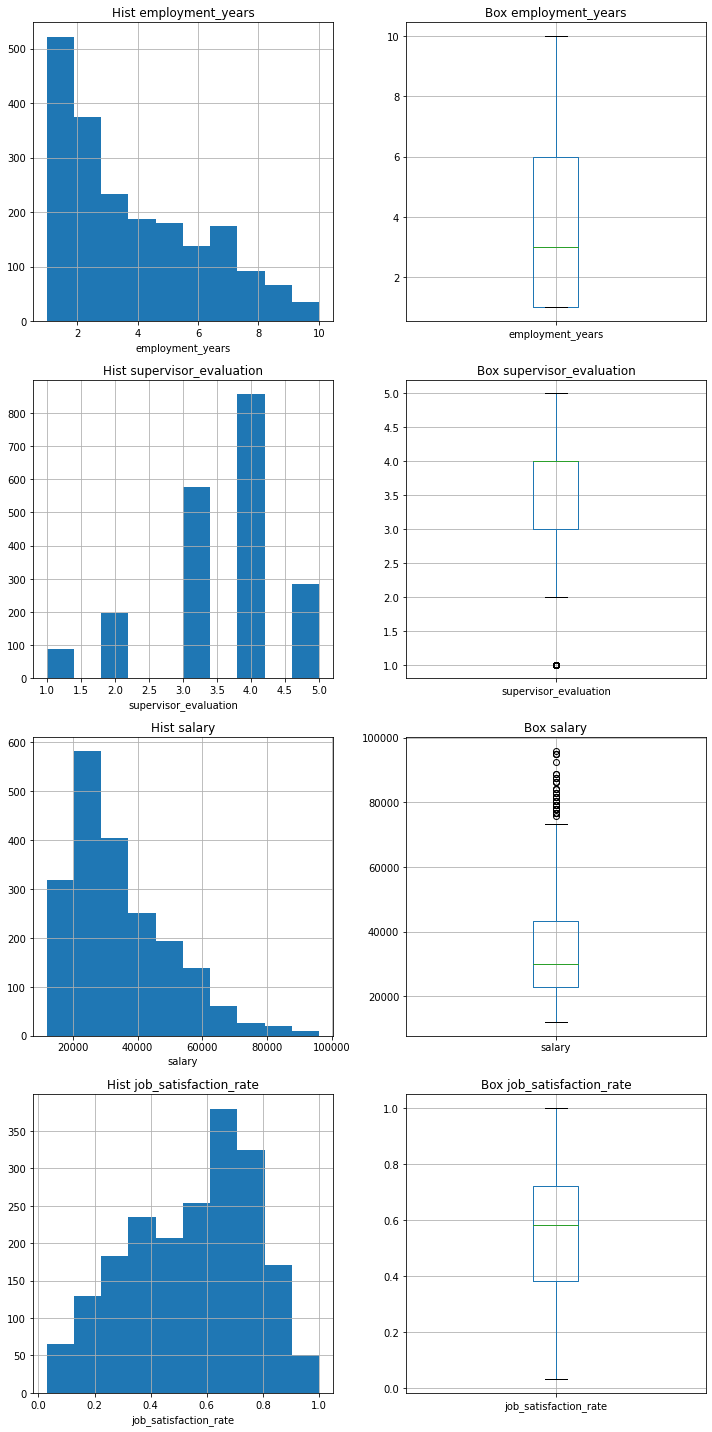

In [22]:
num_research(pre_test);

In [23]:
pre_test.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,552765.213500,3.666500,3.526500,34066.800000,0.54878
std,253851.326129,2.537222,0.996892,15398.436729,0.22011
min,100298.000000,1.000000,1.000000,12000.000000,0.03000
25%,339052.000000,1.000000,3.000000,22800.000000,0.38000
50%,550793.000000,3.000000,4.000000,30000.000000,0.58000
75%,765763.750000,6.000000,4.000000,43200.000000,0.72000
max,999029.000000,10.000000,5.000000,96000.000000,1.00000


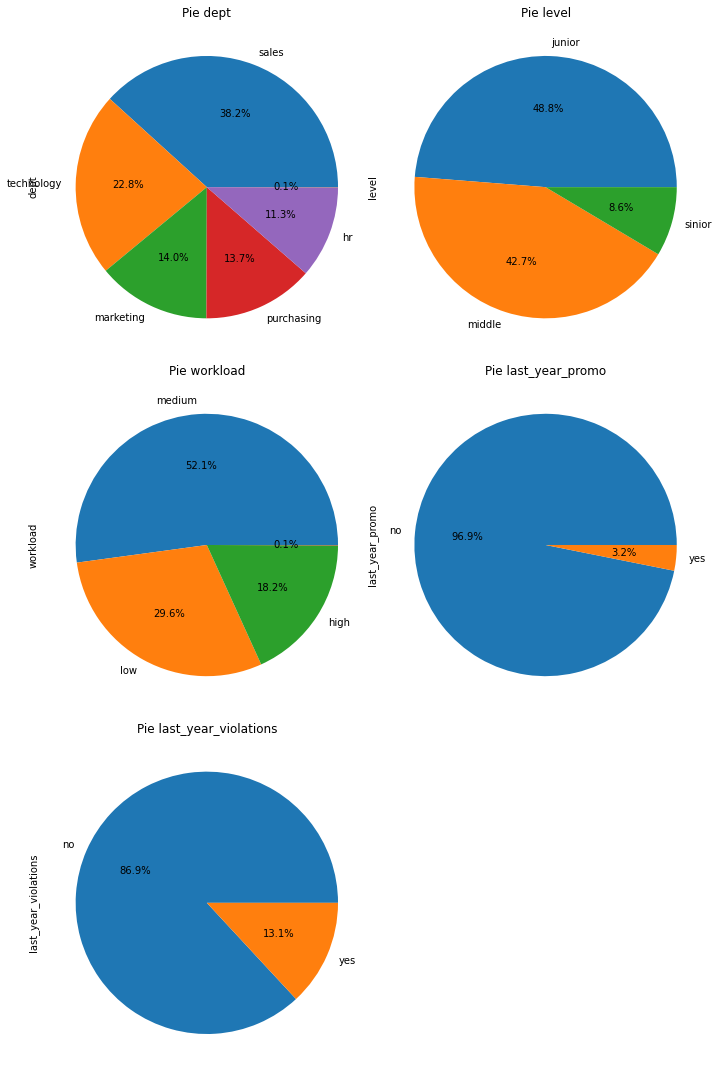

In [24]:
pie(pre_test)

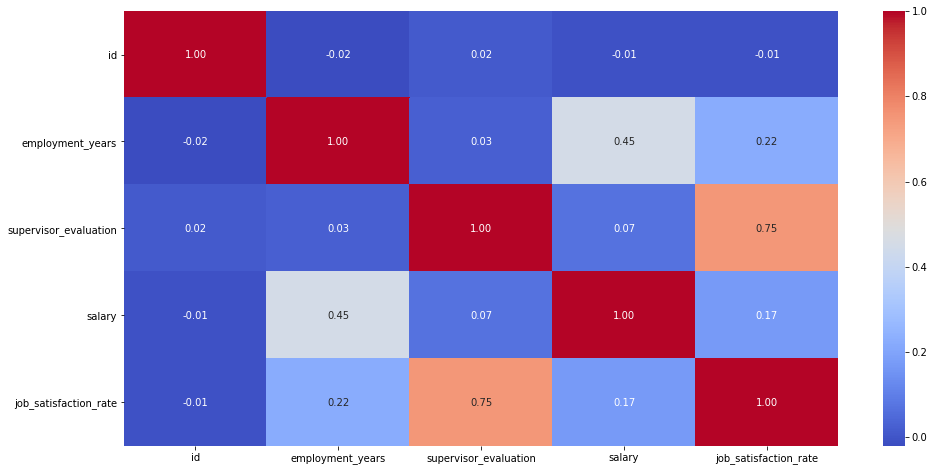

In [25]:
plt.figure(figsize=(16, 8))
cm_test = pre_test.corr(method='spearman')
sns.heatmap(cm_test, annot=True, fmt='.2f', cmap='coolwarm');

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable id is large: 2000. Are you sure this is not an interval variable? Analysis for pairs of variables including id can be slow.
  warnings.warn(


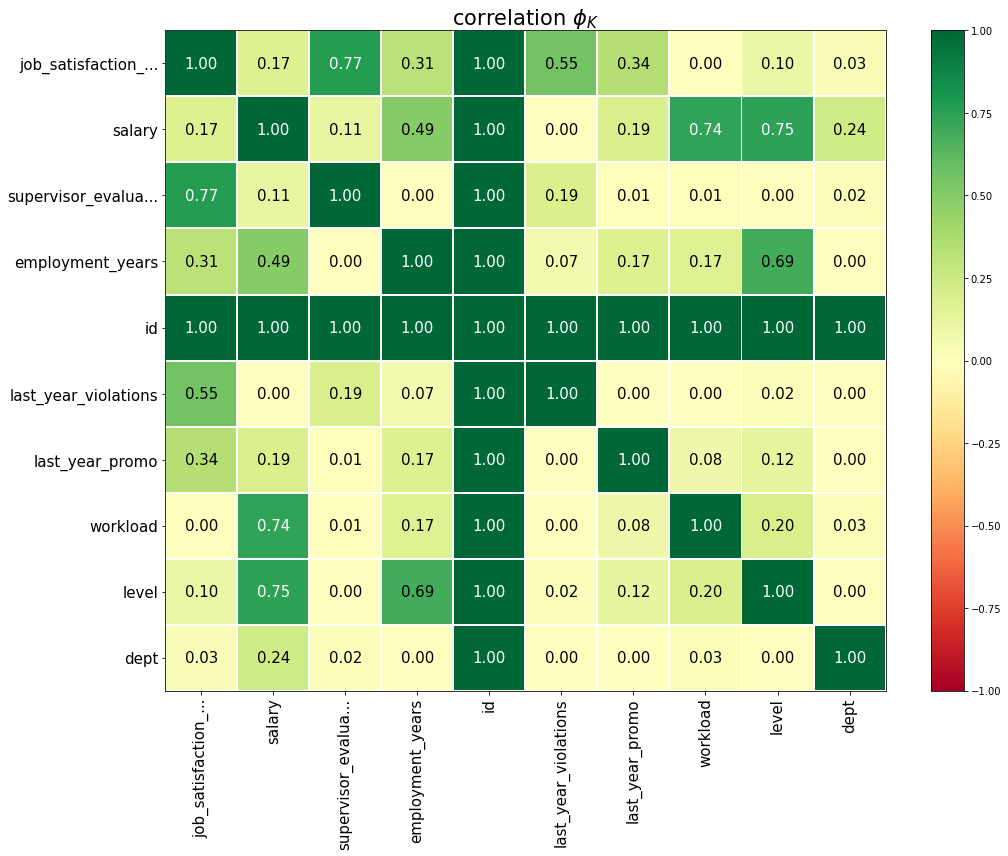

In [26]:
# список интервальных признаков
interval_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = pre_test.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

**Вывод:** На этапе исследования данных было выявлено, что данные из тренировочной и тестовой выборок распределены схожим образом. В признаках наблюдается дисбаланс, но он отражает реальную картину происходящего (например, level: junior большинство, и их не может быть столько же сктолько и senior). На boxplot видны выбросы, но это не аномальные значения, так как они отражают реальные данные. При проведении корреляционого анализа мультиколлинеарность не была выявлена.

### Подготовка данных

In [27]:
X_train = pre_train.drop(['job_satisfaction_rate', 'id'], axis=1)
y_train = pre_train['job_satisfaction_rate']

X_test = pre_test.drop(['job_satisfaction_rate', 'id'], axis=1)
y_test = pre_test['job_satisfaction_rate']

In [28]:
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

### Обучение моделей

In [29]:
# Метрика
def func_smape(true, predict):
    # Вычисляем sMAPE
    s = 100 / len(true) * np.sum(2 * np.abs(true - predict) / (np.abs(true) + np.abs(predict)))
    return s

smape = make_scorer(func_smape, greater_is_better=False)

In [30]:
RANDOM_STATE = 42

# Игнорирование FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 80),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
        # словарь для модели KNeighborsRegressor()
    {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2, 80),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
        # словарь для модели SVR()
    {
        'models': [SVR()],
        'models__C': [0.1, 1, 5, 10, 50, 100],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape,
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpl...
                                         'models__n_neighbors': range(2, 80),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVR()],
                                         'models__C': [0.1, 1, 5, 10, 50, 100],
                                         'models__kernel': ['linear', 'rbf'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(func_smape, greater_is_better=False, response_method='predict'))

In [31]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на cv-выборке:', randomized_search.best_score_)

# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {func_smape(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

In [32]:
results = pd.DataFrame(randomized_search.cv_results_)

filtered_results = results.query('-1*mean_test_score > 0')

top_10_results = filtered_results.sort_values(by='mean_test_score', ascending=False).head(10)

for index, row in top_10_results.iterrows():
    print(f"Ранг: {index + 1}")
    print(f"Модель: {row['params']['models'].__class__.__name__}")
    print(f"Параметры: {row['params']}")
    print(f"Оценка (mean_test_score): {row['mean_test_score']}")
    print("-" * 50)

Ранг: 63
Модель: DecisionTreeRegressor
Параметры: {'preprocessor__num': MinMaxScaler(), 'models__max_features': 8, 'models__max_depth': 41, 'models': DecisionTreeRegressor(random_state=42)}
Оценка (mean_test_score): -15.214635277967972
--------------------------------------------------
Ранг: 52
Модель: DecisionTreeRegressor
Параметры: {'preprocessor__num': MinMaxScaler(), 'models__max_features': 8, 'models__max_depth': 50, 'models': DecisionTreeRegressor(random_state=42)}
Оценка (mean_test_score): -15.214635277967972
--------------------------------------------------
Ранг: 45
Модель: DecisionTreeRegressor
Параметры: {'preprocessor__num': StandardScaler(), 'models__max_features': 8, 'models__max_depth': 64, 'models': DecisionTreeRegressor(random_state=42)}
Оценка (mean_test_score): -15.248114613107532
--------------------------------------------------
Ранг: 41
Модель: DecisionTreeRegressor
Параметры: {'preprocessor__num': StandardScaler(), 'models__max_features': 8, 'models__max_depth':

В топ-10 моделей вошел только модели класса DecisionTreeRegressor, но с разными параметрами. Лучше всего себя показали:
- DecisionTreeRegressor(max_depth=50, max_features=8, random_state=42))])
- DecisionTreeRegressor(max_depth=41, max_features=8, random_state=42))])

Обе модели имеют одинакову оценку (mean_test_score) на cv-выборке: -15.214635277967972, поэтому было принято решение взять одну из них, а именно: DecisionTreeRegressor(max_depth=50, max_features=8, random_state=42))])

### Оформление выводов
Лучше всего справилась модель DecisionTreeRegressor(max_depth=50, max_features=8, random_state=42))]), показатель метрики smape на тестовой выборке smape составил 14.2088. 

## Задача: Предсказание увольнения сотрудника из компании

### Загрузка данных

In [33]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
X_test_quit = pd.read_csv('/datasets/test_features.csv')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [34]:
train_quit.info()
train_quit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [35]:
X_test_quit.info()
X_test_quit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [36]:
test_target_quit.info()
test_target_quit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


**Вывод:** Данные соответствуют описанию задачи. Названия и типы столбцов соответствуют стандартам оформления. Присутсвтуют пропуски, которые будут обработаны на следующем этапе.

### Предобработка данных

In [37]:
# Train_quit
# Проверка пропусков
print(train_quit.isna().sum());
# Поиск явных дубликатов
print('\nКоличество дубликатов:', train_quit.duplicated().sum())

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

Количество дубликатов: 0


In [38]:
# Train_quit
# Проверка пропусков
print(X_test_quit.isna().sum());
# Поиск явных дубликатов
print('\nКоличество дубликатов:', X_test_quit.duplicated().sum())

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Количество дубликатов: 0


In [39]:
# Train_quit
# Проверка пропусков
print(test_target_quit.isna().sum());
# Поиск явных дубликатов
print('\nКоличество дубликатов:', test_target_quit.duplicated().sum())

id      0
quit    0
dtype: int64

Количество дубликатов: 0


In [40]:
test_quit = X_test_quit.merge(test_target_quit, on='id')

In [41]:
test_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,no
1,686555,hr,junior,medium,1,no,no,4,30000,no
2,467458,sales,middle,low,5,no,no,4,19200,no
3,418655,sales,middle,low,6,no,no,4,19200,no
4,789145,hr,middle,medium,5,no,no,5,40800,no


In [42]:
num_features = ['id', 'employment_years', 'supervisor_evaluation', 'salary']
cat_features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
all_columns =  cat_features + num_features


imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
prepreprocessor = ColumnTransformer(
    transformers=[
        ('imputer', imputer, cat_features),
        ('num_p', 'passthrough', num_features)
    ],
    remainder='passthrough')

prepreprocessor = Pipeline([('prepreprocessor', prepreprocessor)])

train_quit_prepreprocessed = prepreprocessor.fit_transform(train_quit)
pre_train_quit = pd.DataFrame(train_quit_prepreprocessed, columns=all_columns)

test_quit_prepreprocessed = prepreprocessor.transform(test_quit)
pre_test_quit = pd.DataFrame(test_quit_prepreprocessed, columns=all_columns)

print(pre_train_quit.isna().sum())
print()
print(pre_test_quit.isna().sum())

dept                     0
level                    0
workload                 0
last_year_promo          0
last_year_violations     0
quit                     0
id                       0
employment_years         0
supervisor_evaluation    0
salary                   0
dtype: int64

dept                     0
level                    0
workload                 0
last_year_promo          0
last_year_violations     0
quit                     0
id                       0
employment_years         0
supervisor_evaluation    0
salary                   0
dtype: int64


In [43]:
pre_train_quit[['id', 'employment_years', 'supervisor_evaluation', 
                'salary']] = pre_train_quit[['id', 'employment_years', 
           'supervisor_evaluation', 'salary']].astype(int)

pre_test_quit[['id', 'employment_years', 'supervisor_evaluation', 
           'salary']] = pre_test_quit[['id', 'employment_years', 
           'supervisor_evaluation', 'salary']].astype(int)

**Вывод:** На этапе предобработке данных были замечены пропуски, которые были обработаны с помощью пайплайна. Явные дубликаты в данных отсутствовали.

### Исследовательский анализ данных

#### Исследовательский анализ данных

##### Тренировочные данные

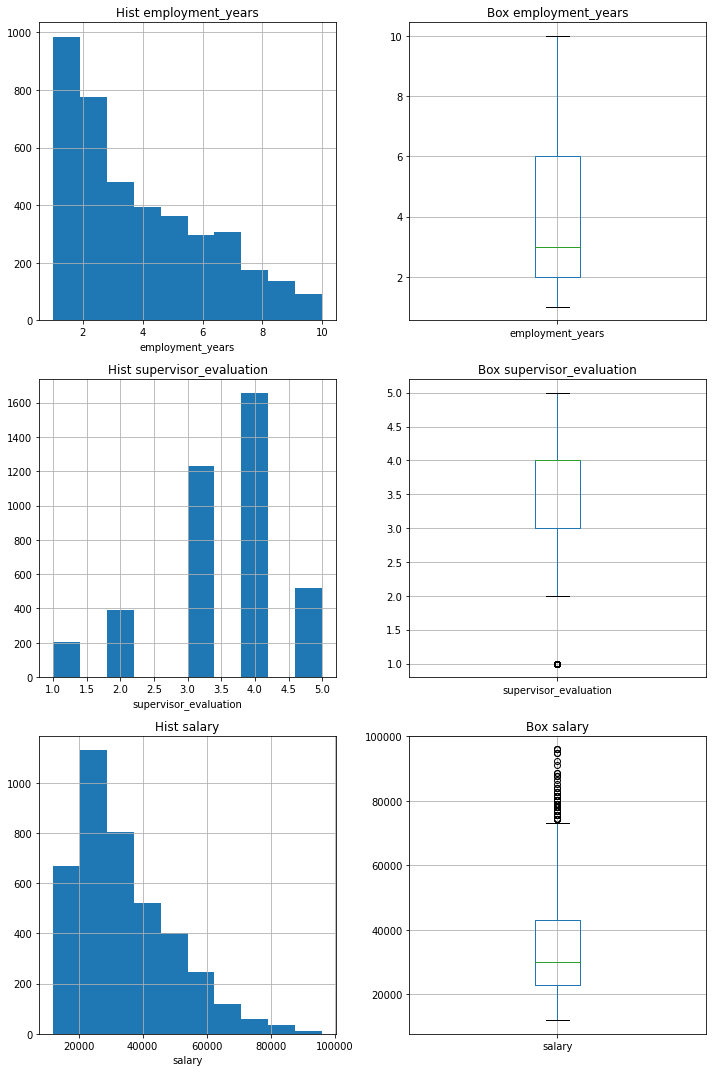

In [44]:
num_research(pre_train_quit)

In [45]:
pre_train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


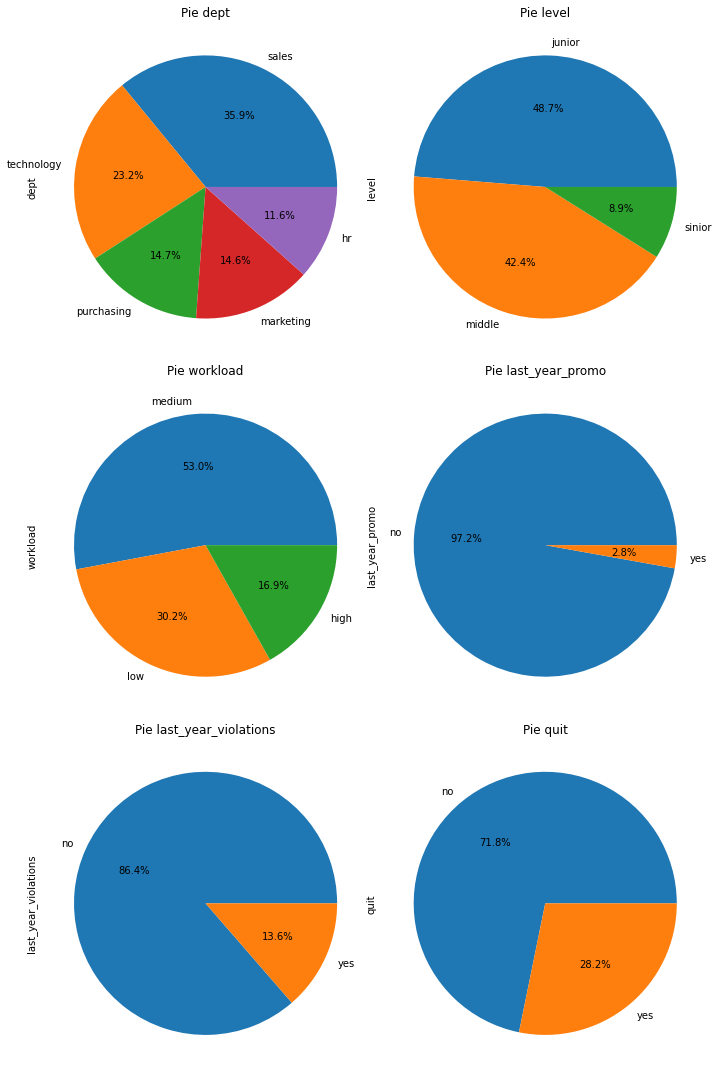

In [46]:
pie(pre_train_quit)

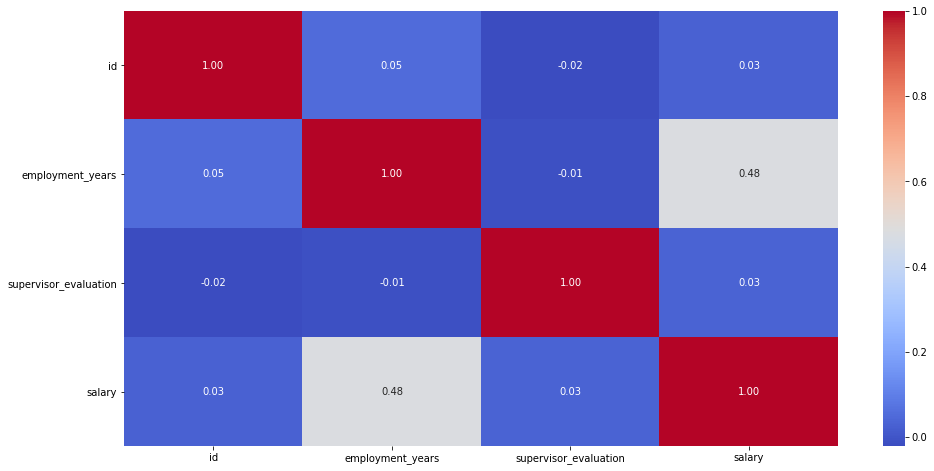

In [47]:
plt.figure(figsize=(16, 8))
cm_train_quit = pre_train_quit.corr(method='spearman')
sns.heatmap(cm_train_quit, annot=True, fmt='.2f', cmap='coolwarm');

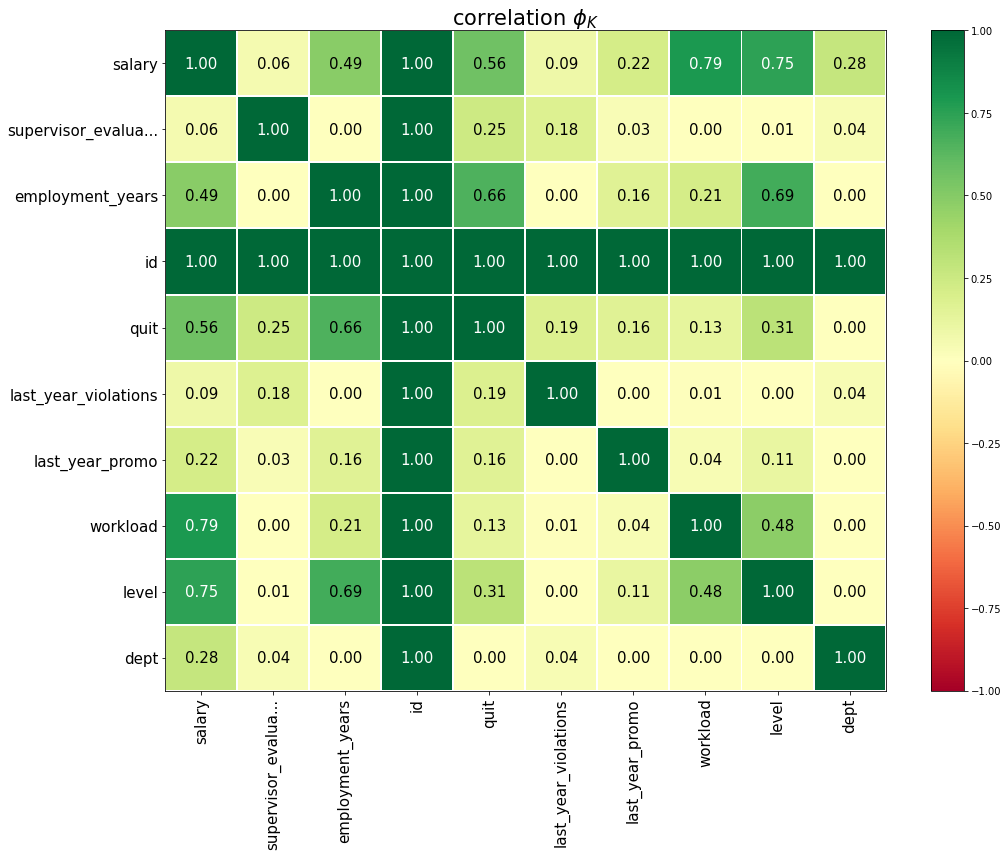

In [48]:
# список интервальных признаков
interval_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = pre_train_quit.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

##### Тестовые данные

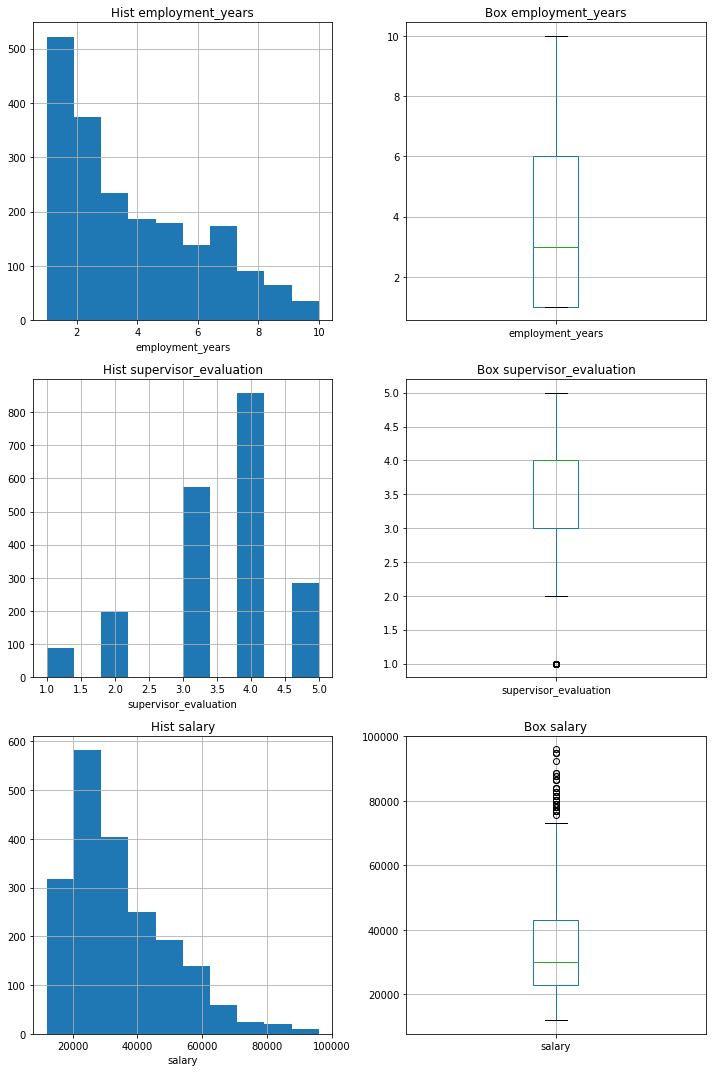

In [49]:
num_research(pre_test_quit)

In [50]:
pre_test_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


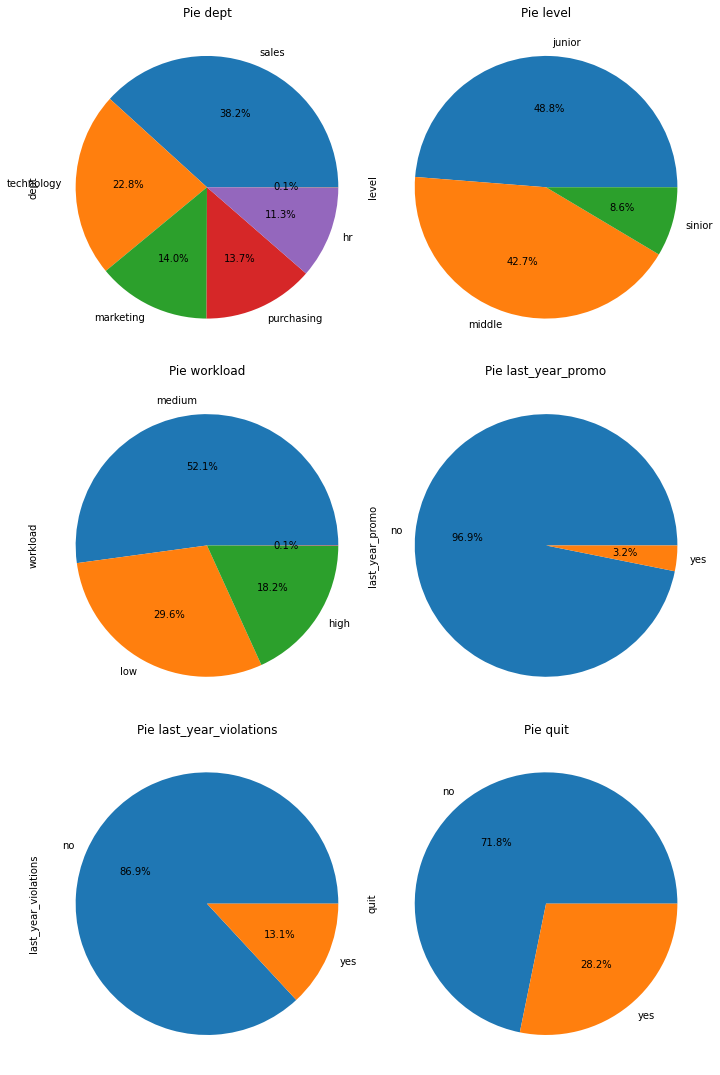

In [51]:
pie(pre_test_quit)

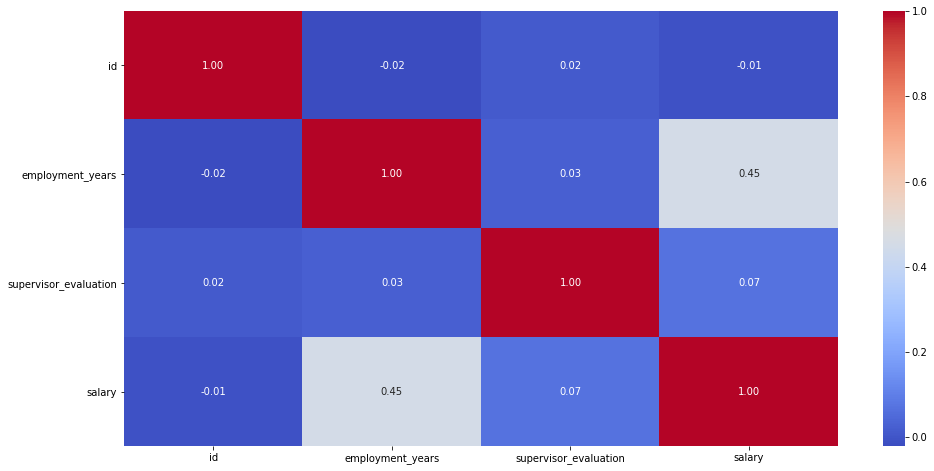

In [52]:
plt.figure(figsize=(16, 8))
cm_test_quit = pre_test_quit.corr(method='spearman')
sns.heatmap(cm_test_quit, annot=True, fmt='.2f', cmap='coolwarm');

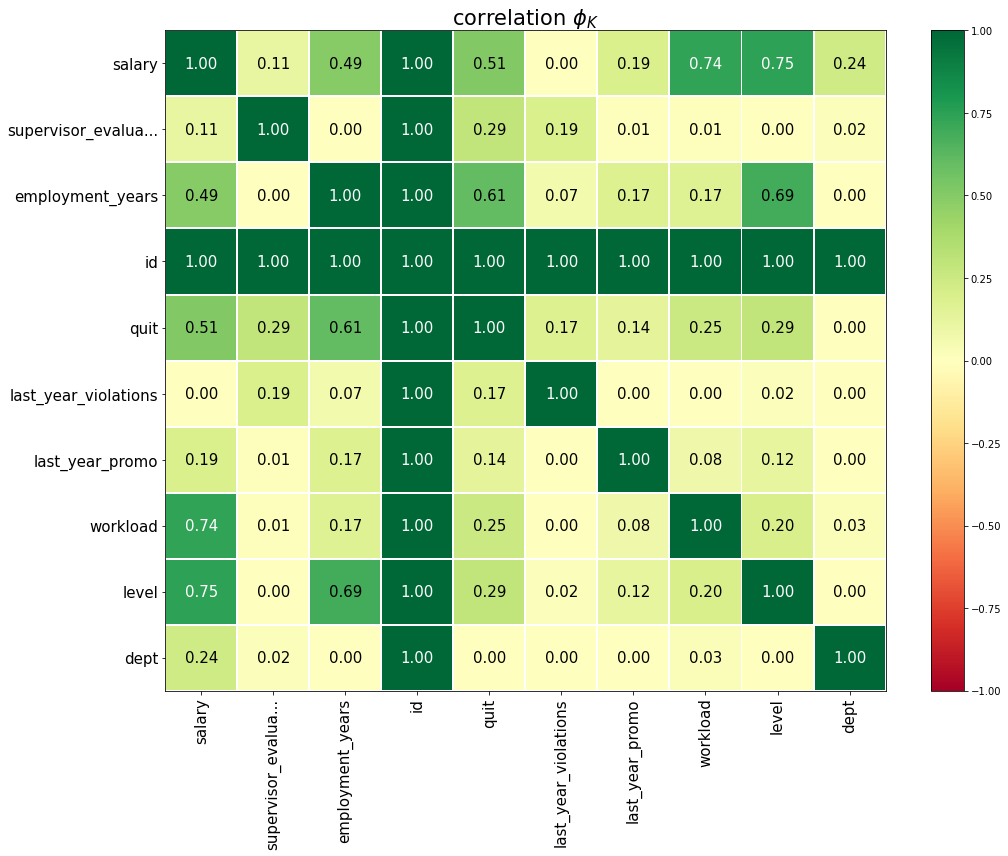

In [53]:
# список интервальных признаков
interval_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = pre_test_quit.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

####  Портрет «уволившегося сотрудника»

In [54]:
pre_train_quit.head()

,dept,level,workload,last_year_promo,last_year_violations,quit,id,employment_years,supervisor_evaluation,salary
0,sales,middle,high,no,no,no,723290,2,4,54000
1,sales,junior,medium,no,no,no,814010,2,4,27600
2,purchasing,middle,medium,no,no,no,155091,5,1,37200
3,sales,junior,medium,no,yes,yes,257132,2,3,24000
4,marketing,junior,medium,no,no,no,910140,2,5,25200


In [55]:
# 1. Определение отдела и уровня загруженности, где с большей вероятностью работает уволившийся сотрудник

# Группировка данных по отделу и расчет доли ушедших сотрудников в каждом отделе
dept_quit_ratio = pre_train_quit.groupby('dept')['quit'].value_counts(normalize=True).unstack()
most_likely_dept = dept_quit_ratio.loc[:, 'yes'].idxmax()

# Группировка данных по уровню загруженности и расчет доли ушедших сотрудников при разных уровнях загруженности
workload_quit_ratio = pre_train_quit.groupby('workload')['quit'].value_counts(normalize=True).unstack()
most_likely_workload = workload_quit_ratio.loc[:, 'yes'].idxmax()

print(f"Отдел, где с большей вероятностью работает уволившийся сотрудник: {most_likely_dept}")
print(f"Уровень загруженности уволившихся сотрудников: {most_likely_workload}")

Отдел, где с большей вероятностью работает уволившийся сотрудник: technology
Уровень загруженности уволившихся сотрудников: low


In [56]:
avg_salary_quit = pre_train_quit[pre_train_quit['quit'] == 'yes']['salary'].mean()
avg_salary_stayed = pre_train_quit[pre_train_quit['quit'] == 'no']['salary'].mean()

print(f"Средняя зарплата ушедших сотрудников: {avg_salary_quit}")
print(f"Средняя зарплата сотрудников, оставшихся в компании: {avg_salary_stayed}")

Средняя зарплата ушедших сотрудников: 23885.106382978724
Средняя зарплата сотрудников, оставшихся в компании: 37702.22841225627


#### Влияние уровеня удовлетворённости сотрудника работой в компании на факт увольнения сотрудника

In [57]:
y_test_q = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [58]:
pre_test_quit = pre_test_quit.merge(y_test_q, on='id')

In [59]:
pre_test_quit.head()

,dept,level,workload,last_year_promo,last_year_violations,quit,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,no,no,no,485046,2,5,28800,0.79
1,hr,junior,medium,no,no,no,686555,1,4,30000,0.72
2,sales,middle,low,no,no,no,467458,5,4,19200,0.64
3,sales,middle,low,no,no,no,418655,6,4,19200,0.60
4,hr,middle,medium,no,no,no,789145,5,5,40800,0.75


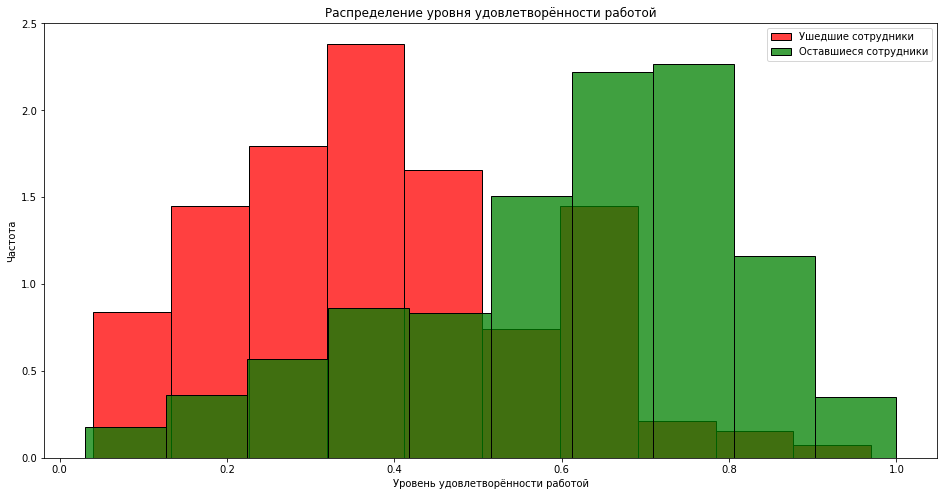

In [60]:
# Создаем гистограммы распределения job_satisfaction_rate для ушедших и оставшихся сотрудников
plt.figure(figsize=(16, 8))

# Ушедшие сотрудники
sns.histplot(pre_test_quit[pre_test_quit['quit'] == 'yes']['job_satisfaction_rate'], 
             bins=10, color='red', stat='density', common_norm=False, label='Ушедшие сотрудники')

# Оставшиеся сотрудники
sns.histplot(pre_test_quit[pre_test_quit['quit'] == 'no']['job_satisfaction_rate'], 
             bins=10, color='green', stat='density', common_norm=False, label='Оставшиеся сотрудники')

# Добавляем легенду и подписи
plt.legend()
plt.title('Распределение уровня удовлетворённости работой')
plt.xlabel('Уровень удовлетворённости работой')
plt.ylabel('Частота')

# Показать график
plt.show()

**Вывод:** 
- На этапе исследования данных было выявлено, что данные из тренировочной и тестовой выборок распределены схожим образом. В признаках наблюдается дисбаланс, но он отражает реальную картину происходящего (например, level: junior большинство, и их не может быть столько же сктолько и senior). На boxplot видны выбросы, но это не аномальные значения, так как они отражают реальные данные.
- Портрет «уволившегося сотрудника»:
    - Отдел: technology
    - Уровень загруженности: low
    - Средняя зарплата: 23885, что меньше средней оставшихся в компании (37702)
- Уровень удовлетворённости сотрудника работой в компании действительно влияет на то, уволится ли сотрудник: чем он больше, тем меньше сотрудников уволняется.

### Добавление нового входного признака

In [61]:
pre_train_quit.head()

,dept,level,workload,last_year_promo,last_year_violations,quit,id,employment_years,supervisor_evaluation,salary
0,sales,middle,high,no,no,no,723290,2,4,54000
1,sales,junior,medium,no,no,no,814010,2,4,27600
2,purchasing,middle,medium,no,no,no,155091,5,1,37200
3,sales,junior,medium,no,yes,yes,257132,2,3,24000
4,marketing,junior,medium,no,no,no,910140,2,5,25200


In [62]:
X_train_quit = pre_train_quit.drop('quit', axis=1)
y_train_quit = pre_train_quit['quit']

In [63]:
y_train_quit_predict = randomized_search.predict(X_train_quit)
y_train_quit_predict.shape

(4000,)

In [64]:
X_train_quit['job_satisfaction_rate'] = y_train_quit_predict
X_train_quit.head()

,dept,level,workload,last_year_promo,last_year_violations,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,middle,high,no,no,723290,2,4,54000,0.600000
1,sales,junior,medium,no,no,814010,2,4,27600,0.826111
2,purchasing,middle,medium,no,no,155091,5,1,37200,0.380000
3,sales,junior,medium,no,yes,257132,2,3,24000,0.380000
4,marketing,junior,medium,no,no,910140,2,5,25200,0.690000


In [65]:
pre_test_quit.head()

,dept,level,workload,last_year_promo,last_year_violations,quit,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,no,no,no,485046,2,5,28800,0.79
1,hr,junior,medium,no,no,no,686555,1,4,30000,0.72
2,sales,middle,low,no,no,no,467458,5,4,19200,0.64
3,sales,middle,low,no,no,no,418655,6,4,19200,0.60
4,hr,middle,medium,no,no,no,789145,5,5,40800,0.75


In [66]:
X_test_quit = pre_test_quit.drop(['quit', 'job_satisfaction_rate'], axis=1)
y_test_quit = pre_test_quit['quit']

In [67]:
y_test_quit_predict = randomized_search.predict(X_test_quit)
y_test_quit_predict.shape

(2000,)

In [68]:
X_test_quit['job_satisfaction_rate'] = y_test_quit_predict
X_test_quit.head()

,dept,level,workload,last_year_promo,last_year_violations,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,no,no,485046,2,5,28800,0.866667
1,hr,junior,medium,no,no,686555,1,4,30000,0.681429
2,sales,middle,low,no,no,467458,5,4,19200,0.657143
3,sales,middle,low,no,no,418655,6,4,19200,0.655000
4,hr,middle,medium,no,no,789145,5,5,40800,0.760000


### Подготовка данных

In [69]:
X_train_q = X_train_quit
y_train_q = y_train_quit

X_test_q = X_test_quit
y_test_q = y_test_quit

In [70]:
X_train_q.head()

,dept,level,workload,last_year_promo,last_year_violations,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,middle,high,no,no,723290,2,4,54000,0.600000
1,sales,junior,medium,no,no,814010,2,4,27600,0.826111
2,purchasing,middle,medium,no,no,155091,5,1,37200,0.380000
3,sales,junior,medium,no,yes,257132,2,3,24000,0.380000
4,marketing,junior,medium,no,no,910140,2,5,25200,0.690000


In [71]:
X_test_q.head()

,dept,level,workload,last_year_promo,last_year_violations,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,no,no,485046,2,5,28800,0.866667
1,hr,junior,medium,no,no,686555,1,4,30000,0.681429
2,sales,middle,low,no,no,467458,5,4,19200,0.657143
3,sales,middle,low,no,no,418655,6,4,19200,0.655000
4,hr,middle,medium,no,no,789145,5,5,40800,0.760000


In [72]:
y_train_q.head()

0     no
1     no
2     no
3    yes
4     no
Name: quit, dtype: object

In [73]:
y_test_q.head()

0    no
1    no
2    no
3    no
4    no
Name: quit, dtype: object

In [74]:
# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

### Обучение моделей

In [75]:
RANDOM_STATE = 42

# Игнорирование FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(10, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': [1, 10, 50, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            probability=True
        )],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_iter=100,
    n_jobs=-1
)

randomized_search.fit(X_train_q, y_train_q)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpl...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': [1, 10, 50, 100],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ['linear', 'rbf'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [76]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс валидацинной выборке:', randomized_search.best_score_)

y_test_q_pred = randomized_search.predict_proba(X_test_q)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_q, y_test_q_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

In [78]:
results = pd.DataFrame(randomized_search.cv_results_)
top_10_results = results.sort_values(by='mean_test_score', ascending=False).head(10)

for rank, (index, row) in enumerate(top_10_results.iterrows(), start=1):
    print(f"Ранг: {rank}")
    print(f"Модель: {row['params']['models'].__class__.__name__}")
    print(f"Параметры: {row['params']}")
    print(f"Оценка (mean_test_score) на кросс-валидации: {row['mean_test_score']}")
    print("-" * 40)

Ранг: 1
Модель: DecisionTreeClassifier
Параметры: {'preprocessor__num': StandardScaler(), 'models__max_features': 8, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}
Оценка (mean_test_score) на кросс-валидации: 0.9287223589167459
----------------------------------------
Ранг: 2
Модель: DecisionTreeClassifier
Параметры: {'preprocessor__num': StandardScaler(), 'models__max_features': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}
Оценка (mean_test_score) на кросс-валидации: 0.9262212880888552
----------------------------------------
Ранг: 3
Модель: DecisionTreeClassifier
Параметры: {'preprocessor__num': StandardScaler(), 'models__max_features': 9, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}
Оценка (mean_test_score) на кросс-валидации: 0.9241592532402871
----------------------------------------
Ранг: 4
Модель: DecisionTreeClassifier
Параметры: {'preprocessor__num': MinMaxScaler(), 'models__max_features

Здесь в топ-10 моделей опять вошли только модели класса DecisionTree, а именно DecisionTreeClassifier, но с разными параметрами. Лучше всего себя показала: DecisionTreeClassifier(max_depth=5, max_features=8, random_state=42)

Данная модель имеет наивысшую оценку (mean_test_score) на cv-выборке: 0.9287223589167459, поэтому было принято решение взять именно ее.

### Оформление выводов
Лучше всего справилась модель DecisionTreeClassifier(max_depth=5, max_features=8 ,random_state=42), показатель метрики AUC на тестовой выборке составил 0.9168. 

## Общий вывод
Необходимо было построить две модели, которые смогли бы на основе данных заказчика предсказать:
- уровень удовлетворённости сотрудника .
- уволится ли сотрудник из компании.


Для реализации следующих задач были выполнены следущие шаги:
- Задача 1: Предсказание уровня удовлетворённости сотрудника
    - На этапе загрузки данных было выялено, что они соответствуют описанию задачи. Названия и типы столбцов соответствуют стандартам оформления. Присутсвтуют пропуски.
    - На этапе предобработке данных были замечены пропуски, которые были обработаны с помощью пайплайна. Явные дубликаты в данных отсутствовали.
    - На этапе исследования данных было выявлено, что данные из тренировочной и тестовой выборок распределены схожим образом. В признаках наблюдается дисбаланс, но он отражает реальную картину происходящего (например, level: junior большинство, и их не может быть столько же сктолько и senior). На boxplot видны выбросы, но это не аномальные значения, так как они отражают реальные данные.
    - Далее были подготовлены признаки с использованием пайплайна. При кодировании учитывались особенности признаков и моделей. 
    - После чего были обучены четыре модели: DecisionTreeRegressor, LinearRegression, KNeighborsRegressor и SVR.
    - Лучше всего справилась модель DecisionTreeRegressor(max_depth=17, max_features=7, random_state=42)), показатель метрики smape на тестовой выборке smape составил 16.53. Меньшего, к сожалению, добиться не удалось ни с помощью гиперпараметров, ни с помощью дргуих моделей.
    

    
    
- Задача 2: Предсказание увольнения сотрудника из компании
    - На этапе загрузки данных было выялено, что они соответствуют описанию задачи. Названия и типы столбцов соответствуют стандартам оформления. Присутсвтуют пропуски.
    - На этапе предобработке данных были замечены пропуски, которые были обработаны с помощью пайплайна. Явные дубликаты в данных отсутствовали.
    - На этапе исследования данных было выявлено, что данные из тренировочной и тестовой выборок распределены схожим образом. В признаках наблюдается дисбаланс, но он отражает реальную картину происходящего (например, level: junior большинство, и их не может быть столько же сктолько и senior). На boxplot видны выбросы, но это не аномальные значения, так как они отражают реальные данные.
        - Портрет «уволившегося сотрудника»:
            - Отдел: technology
            - Уровень загруженности: low
            - Средняя зарплата: 23885, что меньше средней оставшихся в компании (37702)
        - Уровень удовлетворённости сотрудника работой в компании действительно влияет на то, уволится ли сотрудник: чем он больше, тем меньше сотрудников уволняется.
    - На следующем эатпе был добавлен job_satisfaction_rate, предсказанный лучшей моделью из первой задачи, к входным признакам второй задачи.
    - Далее были подготовлены признаки с использованием пайплайна. При кодировании учитывались особенности признаков и моделей. 
    - После чего были обучены четыре модели: DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier и SVC.
    - Лучше всего справилась модель DecisionTreeClassifier(max_depth=5, max_features=9,random_state=42), показатель метрики AUC на тестовой выборке smape составил 0.9188.
    
Учитывая результаты проделанной работы, предлагается:
- повысить уровень удовлетворенности сотрудников, посредствам повышения зарабаотной платы, с целью избежать их увольнения.
- автоматизировать процессы, выполняемыме сотрудниками с низкой загруженностью и сократить их.